In [1]:
import talib as ta
import pandas as pd
import numpy as np
import tushare as ts
import matplotlib.pyplot as plt
from pylab import *
import seaborn as sns
%matplotlib inline
matplotlib.rcParams['axes.unicode_minus'] = False
mpl.rcParams['font.sans-serif'] = ['SimHei']
import datetime as dt

In [3]:
stock_index = ts.get_k_data('hs300','2016-01-01','2017-07-01')

In [4]:
stock_index['date'] = pd.to_datetime(stock_index['date'])

In [5]:
stock_index.set_index('date',inplace=True)

In [6]:
stock_index.head()

,open,close,high,low,volume,code
date,,,,,,
2016-01-04,3725.86,3470.41,3726.24,3469.01,115370674.0,hs300
2016-01-05,3382.18,3478.78,3518.22,3377.28,162116984.0,hs300
2016-01-06,3482.41,3539.81,3543.74,3468.47,145966144.0,hs300
2016-01-07,3481.15,3294.38,3481.15,3284.74,44102641.0,hs300
2016-01-08,3371.87,3361.56,3418.85,3237.93,185959451.0,hs300


In [7]:
# 计算bolling线
stock_index['upper'],stock_index['middle'],stock_index['lower'] = ta.BBANDS(np.asarray(stock_index['close']),
                                                                            timeperiod=20,nbdevup=2,
                                                                            nbdevdn=2,matype=0)
                                                                                                                

No handles with labels found to put in legend.


Text(0.5, 1.0, 'hs300')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


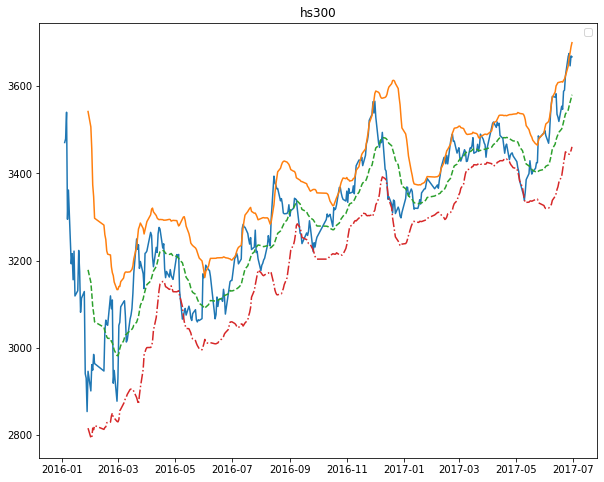

In [10]:
# 画图
fig = plt.figure(figsize=(10,8))
plt.plot(stock_index['close'])
plt.plot(stock_index['upper'],linestyle='-')
plt.plot(stock_index['middle'],linestyle='--')
plt.plot(stock_index['lower'],linestyle='-.')
plt.legend()
plt.title('hs300')

In [11]:
### 交易信号与持仓信号
stock_index['yes_close'] = stock_index['close'].shift(1)
stock_index['yes_lower'] = stock_index['lower'].shift(1)
stock_index['yes_upper'] = stock_index['upper'].shift(1)

# 计算前二日数据
stock_index['daybeforeyes_close'] = stock_index['close'].shift(2)
stock_index['daybeforeyes_lower'] = stock_index['lower'].shift(2)
stock_index['daybeforeyes_upper'] = stock_index['upper'].shift(2)

In [12]:
stock_index.head()

,open,close,high,low,volume,code,upper,middle,lower,yes_close,yes_lower,yes_upper,daybeforeyes_close,daybeforeyes_lower,daybeforeyes_upper
date,,,,,,,,,,,,,,,
2016-01-04,3725.86,3470.41,3726.24,3469.01,115370674.0,hs300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-05,3382.18,3478.78,3518.22,3377.28,162116984.0,hs300,NaN,NaN,NaN,3470.41,NaN,NaN,NaN,NaN,NaN
2016-01-06,3482.41,3539.81,3543.74,3468.47,145966144.0,hs300,NaN,NaN,NaN,3478.78,NaN,NaN,3470.41,NaN,NaN
2016-01-07,3481.15,3294.38,3481.15,3284.74,44102641.0,hs300,NaN,NaN,NaN,3539.81,NaN,NaN,3478.78,NaN,NaN
2016-01-08,3371.87,3361.56,3418.85,3237.93,185959451.0,hs300,NaN,NaN,NaN,3294.38,NaN,NaN,3539.81,NaN,NaN


In [15]:
# 计算交易信号
stock_index['signal'] = np.where(np.logical_and(stock_index['daybeforeyes_close'] < stock_index['daybeforeyes_lower'],
                                               stock_index['yes_close'] > stock_index['yes_upper']),1,0)

stock_index['signal'] = np.where(np.logical_and(stock_index['daybeforeyes_close'] > stock_index['daybeforeyes_lower'],
                                               stock_index['yes_close'] < stock_index['yes_upper']),-1,stock_index['signal'])

In [16]:
stock_index.tail()

,open,close,high,low,volume,code,upper,middle,lower,yes_close,yes_lower,yes_upper,daybeforeyes_close,daybeforeyes_lower,daybeforeyes_upper,signal
date,,,,,,,,,,,,,,,,
2017-06-26,3627.02,3668.09,3671.94,3627.02,134637995.0,hs300,3645.868371,3544.9575,3444.046629,3622.88,3449.111649,3622.560351,3590.34,3435.873927,3615.927073,0
2017-06-27,3665.58,3674.72,3676.53,3648.76,97558702.0,hs300,3665.759441,3554.6720,3443.584559,3668.09,3444.046629,3645.868371,3622.88,3449.111649,3622.560351,0
2017-06-28,3664.16,3646.17,3672.19,3644.03,97920858.0,hs300,3676.424921,3562.3365,3448.248079,3674.72,3443.584559,3665.759441,3668.09,3444.046629,3645.868371,0
2017-06-29,3649.25,3668.83,3669.13,3644.73,85589498.0,hs300,3689.874534,3570.8910,3451.907466,3646.17,3448.248079,3676.424921,3674.72,3443.584559,3665.759441,-1
2017-06-30,3654.73,3666.80,3669.76,3646.23,81510028.0,hs300,3699.269285,3579.9055,3460.541715,3668.83,3451.907466,3689.874534,3646.17,3448.248079,3676.424921,-1
